In [66]:
from utils import conv
from utils import NN2hidden as nn2
from utils import dataprepare as dp
from utils import Feature_extract as fe

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
# import os
# # Load images and filenames
# train_images, train_image_filenames = dp.load_images_from_folder_filenames('rev_patching/patch_image')

# # Extract feature maps from images
# feature_maps = [fe.extract(image) for image in train_images]

# # Save feature maps with the same filenames as the original images
# for i, (feature_map, image_filename) in enumerate(zip(feature_maps, train_image_filenames)):
#     image_name = os.path.splitext(image_filename)[0]
#     pil_image = Image.fromarray(feature_map)
#     pil_image.save(f'rev_patching/feature_extract_image/{image_name}.png', format='PNG')

In [2]:
# Load images and ground truth labels
images_path = 'patching_fix/patch_image'
feature_images_path = 'patching_fix/extract_ori'
ground_truths_path = 'patching_fix/patch_ground'

images_load = dp.load_images_from_folder(images_path)
feature_images_load = dp.load_images_from_folder(feature_images_path)
ground_truths = dp.load_ground_truth_from_folder(ground_truths_path)

In [3]:
feature_images_train = feature_images_load[:math.ceil(len(feature_images_load)*0.8)] 
image_label_train = ground_truths[:math.ceil(len(ground_truths)*0.8)]

image_test = images_load[math.ceil(len(images_load)*0.8):]
image_label_test = ground_truths[math.ceil(len(ground_truths)*0.8):]

In [4]:
len(feature_images_train)

2021

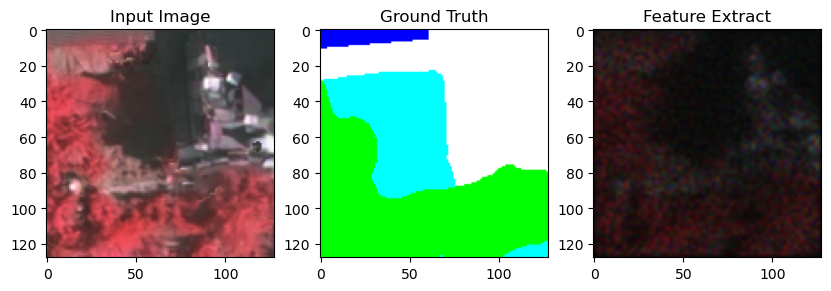

In [5]:
indeks = 1597
# Plot the images
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(images_load[indeks])
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truths[indeks])
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(feature_images_load[indeks])
plt.title('Feature Extract')

plt.show()

In [6]:
# Prepare data
X, y = dp.prepare_data(feature_images_train, image_label_train)

In [12]:
len(X)

3

In [13]:
# Normalize the features
X_normalized = X / 255.0

In [14]:
X_normalized.shape

(3, 33112064)

In [78]:
# Initialize the neural network
input_size = X_normalized.shape[0]
hidden_size1 = 3  # neuron hidden layer 1
hidden_size2 = 2  # neuron hidden layer 2
output_size = 2  # 2 classes: vegetation and non-vegetation
learning_rate = 0.001
num_epochs = 20
toleransi_error = 0.1

# Initialize the neural network with adjusted hidden size
model = nn2.NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Check the shape of weights_hidden_output
print(model.weights_hidden2_output.shape)

(2, 2)


In [79]:
print('Bobot dan bias sebelum training:')
print('Bobot hidden layer 1:\n', model.weights_input_hidden1)
print('Bias hidden layer 1:\n', model.bias_input_hidden1)
print('Bobot hidden layer 2:\n', model.weights_hidden1_hidden2)
print('Bias hidden layer 2:\n', model.bias_hidden1_hidden2)
print('Bobot output layer:\n', model.weights_hidden2_output)
print('Bias output layer:\n', model.bias_hidden2_output)

Bobot dan bias sebelum training:
Bobot hidden layer 1:
 [[ 1.          0.14771691  1.        ]
 [ 0.01339401  0.16945704 -0.66150785]
 [ 1.          0.90291811  0.10087941]]
Bias hidden layer 1:
 [[0. 0. 0.]]
Bobot hidden layer 2:
 [[ 1.         -1.        ]
 [ 0.16769813 -1.        ]
 [-1.          0.57461827]]
Bias hidden layer 2:
 [[0. 0.]]
Bobot output layer:
 [[-1.         0.2207034]
 [ 1.        -1.       ]]
Bias output layer:
 [[0. 0.]]


In [80]:
# Training loop with batching
batch_size = 128
num_batches = X_normalized.shape[1] // batch_size
losses = []
accuracies = []

for epoch in range(num_epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        X_batch = X_normalized[:, start_idx:end_idx].T
        y_batch = y[:, start_idx:end_idx].T
        
        # Forward pass
        output = model.forward(X_batch)
        
        # Compute loss
        loss = nn2.binary_cross_entropy(y_batch, output)
        epoch_loss += loss
        
        
        # Compute accuracy
        predicted_labels = np.argmax(output, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        correct_predictions += np.sum(predicted_labels == true_labels)
        total_predictions += len(true_labels)
        
        # Backpropagation
        model.backward(X_batch, y_batch, learning_rate)
    
    # Average loss for the epoch
    epoch_loss /= num_batches
    losses.append(epoch_loss)
    
    # Accuracy for the epoch
    # accuracy = correct_predictions / total_predictions
    accuracy = 1 - epoch_loss
    accuracies.append(accuracy)
    
    # Print loss
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
    
    # Early stopping
    if epoch_loss < toleransi_error:
        print("Training berhenti karena error sudah kurang dari 0.1")
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
        break

Epoch 1, Loss: 0.2622483990725912, Accuracy: 0.7377516009274088
Epoch 2, Loss: 0.24562801442805415, Accuracy: 0.7543719855719458
Epoch 3, Loss: 0.2413864625719976, Accuracy: 0.7586135374280024
Epoch 4, Loss: 0.24021205330551024, Accuracy: 0.7597879466944898
Epoch 5, Loss: 0.24012831588424388, Accuracy: 0.7598716841157561
Epoch 6, Loss: 0.24032770140794554, Accuracy: 0.7596722985920544
Epoch 7, Loss: 0.24070652228905526, Accuracy: 0.7592934777109448
Epoch 8, Loss: 0.241108992296501, Accuracy: 0.7588910077034989
Epoch 9, Loss: 0.24154289989048622, Accuracy: 0.7584571001095137
Epoch 10, Loss: 0.24198087927926665, Accuracy: 0.7580191207207334
Epoch 11, Loss: 0.2424005014109587, Accuracy: 0.7575994985890413
Epoch 12, Loss: 0.2427074704361707, Accuracy: 0.7572925295638293
Epoch 13, Loss: 0.2429383673337165, Accuracy: 0.7570616326662836
Epoch 14, Loss: 0.2430819341195276, Accuracy: 0.7569180658804724
Epoch 15, Loss: 0.24323426020268876, Accuracy: 0.7567657397973112
Epoch 16, Loss: 0.243335825

In [81]:
print('Bobot dan bias setelah training:')
print('Bobot hidden layer 1:\n', model.weights_input_hidden1)
print('Bias hidden layer 1:\n', model.bias_input_hidden1)
print('Bobot hidden layer 2:\n', model.weights_hidden1_hidden2)
print('Bias hidden layer 2:\n', model.bias_hidden1_hidden2)
print('Bobot output layer:\n', model.weights_hidden2_output)
print('Bias output layer:\n', model.bias_hidden2_output)

Bobot dan bias setelah training:
Bobot hidden layer 1:
 [[ 18.28714306   1.85863786  -3.84122135]
 [-21.7025572   -2.73577157   5.2456538 ]
 [-13.69271861  -1.01657596   3.80514558]]
Bias hidden layer 1:
 [[ 0.37627329 -1.17565385  0.62247222]]
Bobot hidden layer 2:
 [[ 16.1831182  -19.5861884 ]
 [  0.4825188   -1.93622635]
 [ -6.10953934   7.27117189]]
Bias hidden layer 2:
 [[-3.25048329  7.64348469]]
Bobot output layer:
 [[-0.3177856  0.3177856]
 [ 0.5535257 -0.5535257]]
Bias output layer:
 [[0.50199797 0.49800203]]


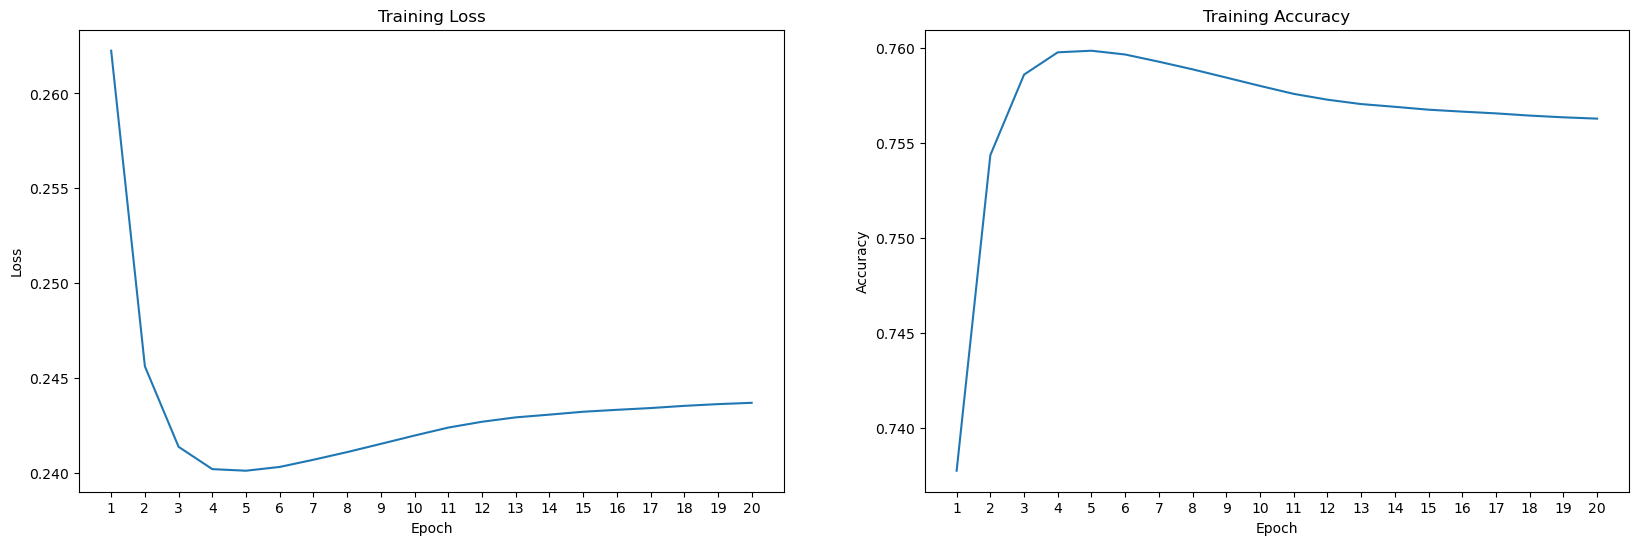

In [82]:
# Plot loss and accuracy
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses) + 1), losses)  # Menyesuaikan sumbu x
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(losses) + 1))  # Menyesuaikan nilai pada sumbu x

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies)  # Menyesuaikan sumbu x
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracies) + 1))  # Menyesuaikan nilai pada sumbu x

plt.show()

In [85]:
# Save weights to a file
def save_weights(weights_hidden2_output, bias_hidden2_output, weights_hidden1_hidden2, bias_hidden1_hidden2, 
                 weights_input_hidden1, bias_input_hidden1, filename):
    with open(filename, 'wb') as f:
        np.savez(f, weights_hidden2_output=weights_hidden2_output, bias_hidden2_output=bias_hidden2_output,
                 weights_hidden1_hidden2=weights_hidden1_hidden2, bias_hidden1_hidden2=bias_hidden1_hidden2,
                 weights_input_hidden1=weights_input_hidden1, bias_input_hidden1=bias_input_hidden1)

save_weights(model.weights_hidden2_output, model.bias_hidden2_output,
             model.weights_hidden1_hidden2, model.bias_hidden1_hidden2,
             model.weights_input_hidden1, model.bias_input_hidden1,
             "2. Bobot_skenario_2.npz")

In [83]:
print(model.output)

[[ 0.5926179   0.4073821 ]
 [ 0.53502095  0.46497905]
 [ 0.78907424  0.21092576]
 [ 1.02219821 -0.02219821]
 [ 1.02687461 -0.02687461]
 [ 0.93619261  0.06380739]
 [ 0.8593444   0.1406556 ]
 [ 1.00753632 -0.00753632]
 [ 1.03180705 -0.03180705]
 [ 1.0338702  -0.0338702 ]
 [ 1.02928531 -0.02928531]
 [ 0.93378987  0.06621013]
 [ 0.83583457  0.16416543]
 [ 0.94784097  0.05215903]
 [ 1.02252357 -0.02252357]
 [ 1.02929078 -0.02929078]
 [ 1.02633337 -0.02633337]
 [ 0.96136153  0.03863847]
 [ 0.81160301  0.18839699]
 [ 0.77342467  0.22657533]
 [ 0.86488304  0.13511696]
 [ 0.97570574  0.02429426]
 [ 0.98490909  0.01509091]
 [ 0.9281536   0.0718464 ]
 [ 0.89337164  0.10662836]
 [ 0.92832694  0.07167306]
 [ 0.99599425  0.00400575]
 [ 1.01411104 -0.01411104]
 [ 1.01856727 -0.01856727]
 [ 1.00711091 -0.00711091]
 [ 1.02134587 -0.02134587]
 [ 1.02896738 -0.02896738]
 [ 1.01536705 -0.01536705]
 [ 0.78097946  0.21902054]
 [ 0.65893347  0.34106653]
 [ 0.91072434  0.08927566]
 [ 0.98490909  0.01509091]
 

before argmax 
 [[ 1.0554914  -0.0554914 ]
 [ 1.05549158 -0.05549158]
 [ 1.05549156 -0.05549156]
 ...
 [ 1.05549307 -0.05549307]
 [ 1.05549336 -0.05549336]
 [ 1.05549316 -0.05549316]]
after argmax 
 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


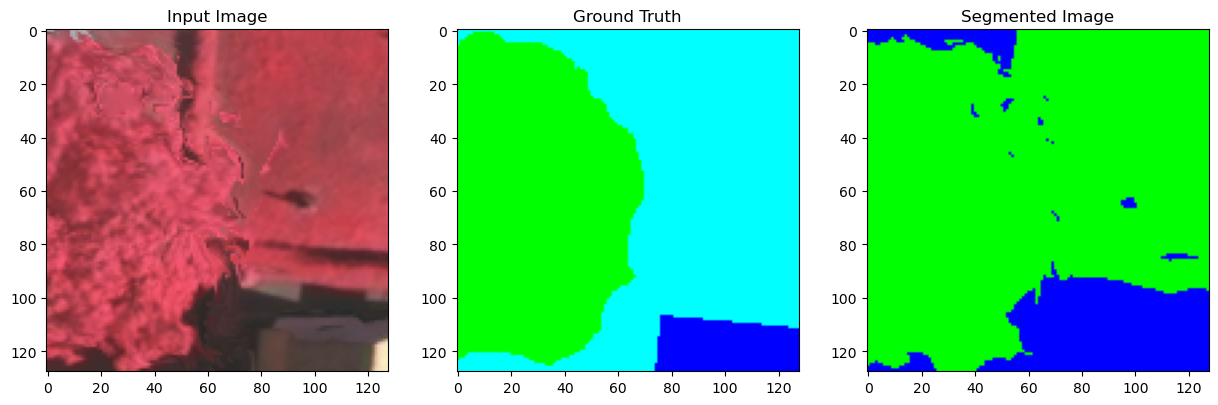

In [84]:
# Define colors for vegetation and non-vegetation
vegetation_color = [0, 255, 0]  # Green
non_vegetation_color = [0, 0, 255]  # Blue

# Visualize segmentation results for one image
indexing = 2
input_image = images_load[indexing]
ground_truth = ground_truths[indexing]
features_get = fe.extract(input_image)

# Preprocess the input image
input_image_reshaped = cv2.resize(input_image, (128, 128)) / 255.0
features = input_image_reshaped.reshape(-1, 3)  # Remove the transpose operation here

# Predict segmentation mask
predicted_mask = model.forward(features)
pred_before = predicted_mask
print('before argmax \n',pred_before)
predicted_mask = predicted_mask.argmax(axis=1).reshape(128, 128)
pred_after= predicted_mask
print('after argmax \n',pred_after)
# print(len(predicted_mask))
# Create segmented image
segmented_image = np.zeros((128, 128, 3), dtype=np.uint8)

# Assign colors based on predicted mask
segmented_image[predicted_mask == 0] = non_vegetation_color
segmented_image[predicted_mask == 1] = vegetation_color

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()

In [24]:
print('nilai prediksi \n', pred_before[50:60])
print('hasil argmax \n', pred_after[2][50:60])

nilai prediksi 
 [[ 0.91309717  0.08292262]
 [ 0.9657361   0.03225555]
 [ 0.99289534  0.00696309]
 [ 1.01450834 -0.01145675]
 [ 1.01434747 -0.0074396 ]
 [ 1.00350878  0.00605556]
 [ 0.99560038  0.01536018]
 [ 0.99342313  0.01787501]
 [ 0.99394047  0.01728584]
 [ 0.99504067  0.01600845]]
hasil argmax 
 [0 0 0 0 0 0 0 0 0 0]


Indeks yang ada warna merah
> 2007
> 2011 - 2013

Keperluan BI indeks analisa : 6, 19, 2012, 3192

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

=-=-=--=-=

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(2, 2, 2)
plt.imshow(features_get)
plt.title('Feature Maps')

plt.subplot(2, 2, 3)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(2, 2, 4)
plt.imshow(segmented_image)
plt.title('Segmented Image')